### SIFT feature detector and descriptor extractor
[link to example](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_sift.html#sphx-glr-auto-examples-features-detection-plot-sift-py)

The scale-invariant feature transform (SIFT) was published in 1999 and is still one of the most popular feature detectors available, as its promises to be "invariant to image scaling, translation and rotation, and partially invariant to illumination changes and affine or 3D projection." Its biggest drawback to its runtime, that's said to be "at two orders of magnitude" slower than ORB, which makes it unsuitable for real-time applications.

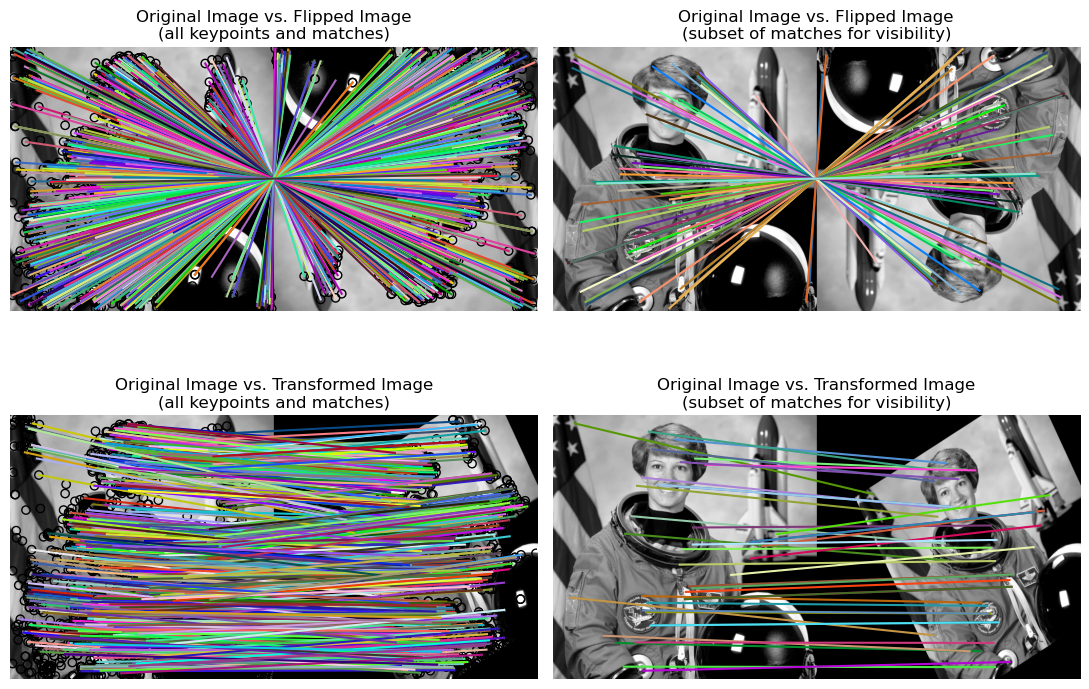

In [13]:
import matplotlib.pyplot as plt

from skimage import data, transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

img_1 = rgb2gray(data.astronaut())
img_2 = transform.rotate(img_1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img_3 = transform.warp(img_1, tform)

descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img_1)
keypoints_1 = descriptor_extractor.keypoints
descriptors_1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_2)
keypoints_2 = descriptor_extractor.keypoints
descriptors_2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_3)
keypoints_3 = descriptor_extractor.keypoints
descriptors_3 = descriptor_extractor.descriptors

matches_1_to_2 = match_descriptors(descriptors_1, descriptors_2, max_ratio=0.6, cross_check=True)
matches_1_to_3 = match_descriptors(descriptors_1, descriptors_3, max_ratio=0.6, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))
plt.gray()

plot_matches(ax[0, 0], img_1, img_2, keypoints_1, keypoints_2, matches_1_to_2)
ax[0, 0].axis('off')
ax[0, 0].set_title("Original Image vs. Flipped Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[1, 0], img_1, img_3, keypoints_1, keypoints_3, matches_1_to_3)
ax[1, 0].axis('off')
ax[1, 0].set_title("Original Image vs. Transformed Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[0, 1], img_1, img_2, keypoints_1, keypoints_2, matches_1_to_2[::15], only_matches=True)
ax[0, 1].axis('off')
ax[0, 1].set_title("Original Image vs. Flipped Image\n"
                   "(subset of matches for visibility)")

plot_matches(ax[1, 1], img_1, img_3, keypoints_1, keypoints_3, matches_1_to_3[::15], only_matches=True)
ax[1, 1].axis('off')
ax[1, 1].set_title("Original Image vs. Transformed Image\n"
                   "(subset of matches for visibility)")

plt.tight_layout()
plt.show()